# Image information

In [5]:
from PIL import Image

# Open an image file
image_path = "roi_test.jpg"  # Replace with your image file path
with Image.open(image_path) as img:
    # Print properties
    print(f"Filename: {image_path}")
    print(f"Format: {img.format}")  # JPEG, PNG, etc.
    print(f"Size: {img.size} (Width x Height in pixels)")  # (width, height)
    print(f"Mode: {img.mode}")  # Color channels (e.g., RGB, RGBA, L)
    print(f"Resolution: {img.info.get('dpi', 'No DPI information')}")

Filename: roi_test.jpg
Format: JPEG
Size: (200, 200) (Width x Height in pixels)
Mode: L
Resolution: No DPI information


# Canny edge detection

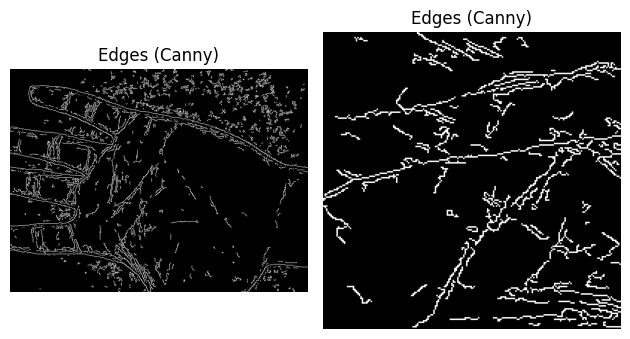

In [8]:
# canny 
# param
sh = 40
sb = 20

# input
image_roi = cv2.imread('roi_test.jpg', cv2.IMREAD_GRAYSCALE)  # Đọc ảnh ROI dưới dạng grayscale (ảnh xám)
edges_roi  = cv2.Canny(image_roi, threshold1=sb, threshold2= sh)  # Phát hiện cạnh với ngưỡng thấp và cao

image_palm = cv2.imread('3.jpg', cv2.IMREAD_GRAYSCALE)
egdes_palm = cv2.Canny(image_palm, threshold1=sb, threshold2= sh)   

plt.figure()  # Tạo một figure mới

plt.subplot(1,2,1)
plt.imshow(egdes_palm, cmap='gray')
plt.title('Edges (Canny)')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(edges_roi, cmap='gray')
plt.title('Edges (Canny)')
plt.axis('off')

plt.tight_layout()  # Tự động căn chỉnh layout
plt.show()


# convert the canny edge detection image into vector
# vector_canny = edges.flatten()

# Sobel edge detection

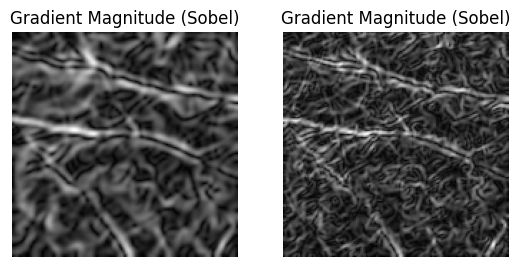

In [74]:
# Sobel tính gradient của ảnh theo trục x và y
sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=21)  # Gradient theo trục x
sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=21)  # Gradient theo trục y

# Tính độ lớn của gradient từ hai thành phần x và y
gradient_magnitude = cv2.magnitude(sobelx, sobely)  # Độ lớn vector gradient tại mỗi pixel

# Chuẩn hóa gradient về giá trị 0-255 để dễ lưu trữ và hiển thị
gradient_magnitude = cv2.normalize(gradient_magnitude, None, 0, 255, cv2.NORM_MINMAX)


plt.figure()  # Tạo một figure mới
plt.subplot(1,2,1)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Gradient Magnitude (Sobel)')
plt.axis('off')


# Another sobel with another k size
# Sobel tính gradient của ảnh theo trục x và y
sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)  # Gradient theo trục x
sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)  # Gradient theo trục y

# Tính độ lớn của gradient từ hai thành phần x và y
gradient_magnitude = cv2.magnitude(sobelx, sobely)  # Độ lớn vector gradient tại mỗi pixel

# Chuẩn hóa gradient về giá trị 0-255 để dễ lưu trữ và hiển thị
gradient_magnitude5 = cv2.normalize(gradient_magnitude, None, 0, 255, cv2.NORM_MINMAX)

# Hiển thị kết quả Sobel
plt.subplot(1,2,2)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Gradient Magnitude (Sobel)')
plt.axis('off')
plt.show()


In [75]:
# canny 

image = cv2.imread('ROI_sample.jpg', cv2.IMREAD_GRAYSCALE)  # Đọc ảnh ROI dưới dạng grayscale (ảnh xám)


edges = cv2.Canny(gradient_magnitude5, threshold1=28, threshold2= 30)  # Phát hiện cạnh với ngưỡng thấp và cao

plt.figure()  # Tạo một figure mới
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('Edges (Canny)')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(edges, cmap='gray')
plt.title('Edges (Canny)')
plt.axis('off')

plt.tight_layout()  # Tự động căn chỉnh layout
plt.show()


# convert the canny edge detection image into vector
vector_canny = edges.flatten()

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\canny.cpp:829: error: (-215:Assertion failed) _src.depth() == CV_8U in function 'cv::Canny'


# Histogram of oriented gradient

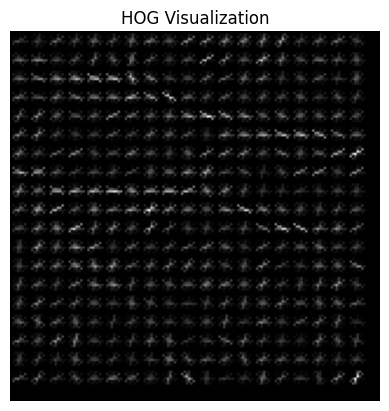

In [62]:

# HOG trích xuất đặc trưng từ hướng gradient và các ô pixel
features_hog, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8),
                              cells_per_block=(2, 2), visualize=True, block_norm='L2-Hys')

# Hiển thị hình ảnh minh họa HOG
plt.figure()  # Tạo một figure mới
plt.imshow(hog_image, cmap='gray')
plt.title('HOG Visualization')
plt.axis('off')
plt.show()